In [ ]:
#https://www.kaggle.com/spscientist/students-performance-in-exams
#Успеваемость на экзаменах
- gender - пол (male/female)                      
- race/ethnicity - рассовая принадлежность (group A B C D E)            
- parental level of education - уровенть образования родителей (bachelor's degree, some college, 
            master's degree, associate's degree, high school, some high school)
- lunch - питание в школе (standard, free/reduced)
- test preparation course - подготовка к экзаменам (none, completed)      
- math score - оценка по математике              
- reading score - оценка по чтению
- writing score - оценка по письму

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#чтение данных
data = pd.read_csv('StudentsPerformance.csv')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   average_score                1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [78]:
#добавлю среднюю оценку и удалю частные оценки
data['average_score'] = ((data['math score'] + data['reading score'] + data['writing score']) / 3).round(2)
data.drop(['math score', 'reading score', 'writing score'], axis = 1, inplace = True)

In [80]:
#кодирую категориальные переменные
def gender_coding(value):
    if value == 'female': return 0
    if value == 'male': return 1
    else: return None
data['gender'] = data['gender'].apply(gender_coding)

def race_coding(value):
    if 'A' in value: return 0
    elif 'B' in value: return 1
    elif 'C' in value: return 2
    elif 'D' in value: return 3
    elif 'E' in value: return 4
    else: return None
data['race/ethnicity'] = data['race/ethnicity'].apply(race_coding)

def ple_coding(value):
    if value == "some high school": return 0 
    elif value == "high school": return 1 
    elif value == "some college": return 2 
    elif value == "associate's degree": return 3 
    elif value == "bachelor's degree": return 4 
    elif value == "master's degree": return 5 
    else: return None
data['parental level of education'] = data['parental level of education'].apply(ple_coding)

def lunch_coding(value):
    if value == 'free/reduced': return 0
    if value == 'standard': return 1
    else: return None
data['lunch'] = data['lunch'].apply(lunch_coding)
    
def tpc_coding(value):
    if value == 'none': return 0
    if value == 'completed': return 1
    else: return None
data['test preparation course'] = data['test preparation course'].apply(tpc_coding)

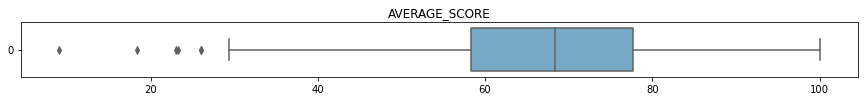

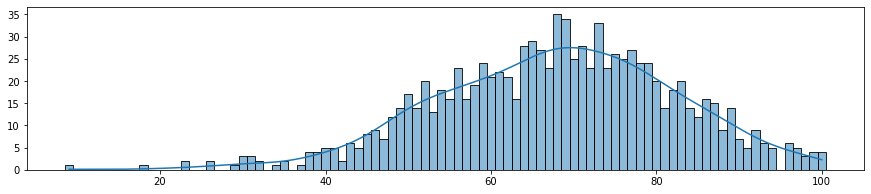

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: average_score, dtype: float64

In [99]:
#EDA
#boxplot & histogram
plt.figure(figsize=(15,1))
ax = sns.boxplot(data=data['average_score'], orient="h", palette="Blues")
ax.set_title('average_score'.upper())
plt.figure(figsize=(15,3))
ax1 = sns.histplot(data=data['average_score'], palette="Blues", kde = True, discrete = True)
ax1.set(xlabel = None, ylabel = None)    
plt.show()
data.describe()['average_score']

In [ ]:
"""
Очевидно наличие выбросов, что позволяет предположить наличие несистематических факторов, влияющих на целевую
переменную.
В целом, распределение целевой переменной очень близко к нормальному, что, вероятно, позволит применить более 
широкий спектр методов предиктивной аналитики и получить высокое качество модели.
"""

Text(0.5, 1.0, 'CORRELATION MATRIX')

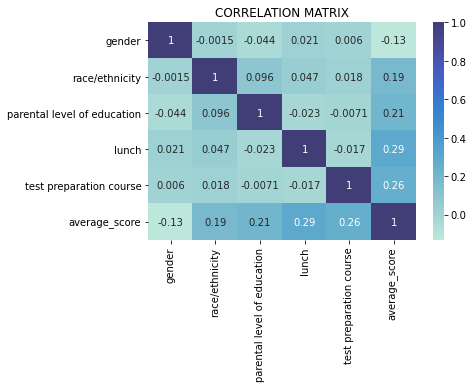

In [125]:
#heatmap
ax = sns.heatmap(data.corr(), annot = True, center = 1.5)
ax.set_title('correlation matrix'.upper())

In [ ]:
"""
HEATMAP для корреляционной матрицы позволяет улучшить восприятие степени взаимной зависимости переменных и 
позволяет сделать предположение о слабой степени корреляции между входными переменными и наличии значимой 
корреляции между некоторыми входными и целевой переменными.
"""

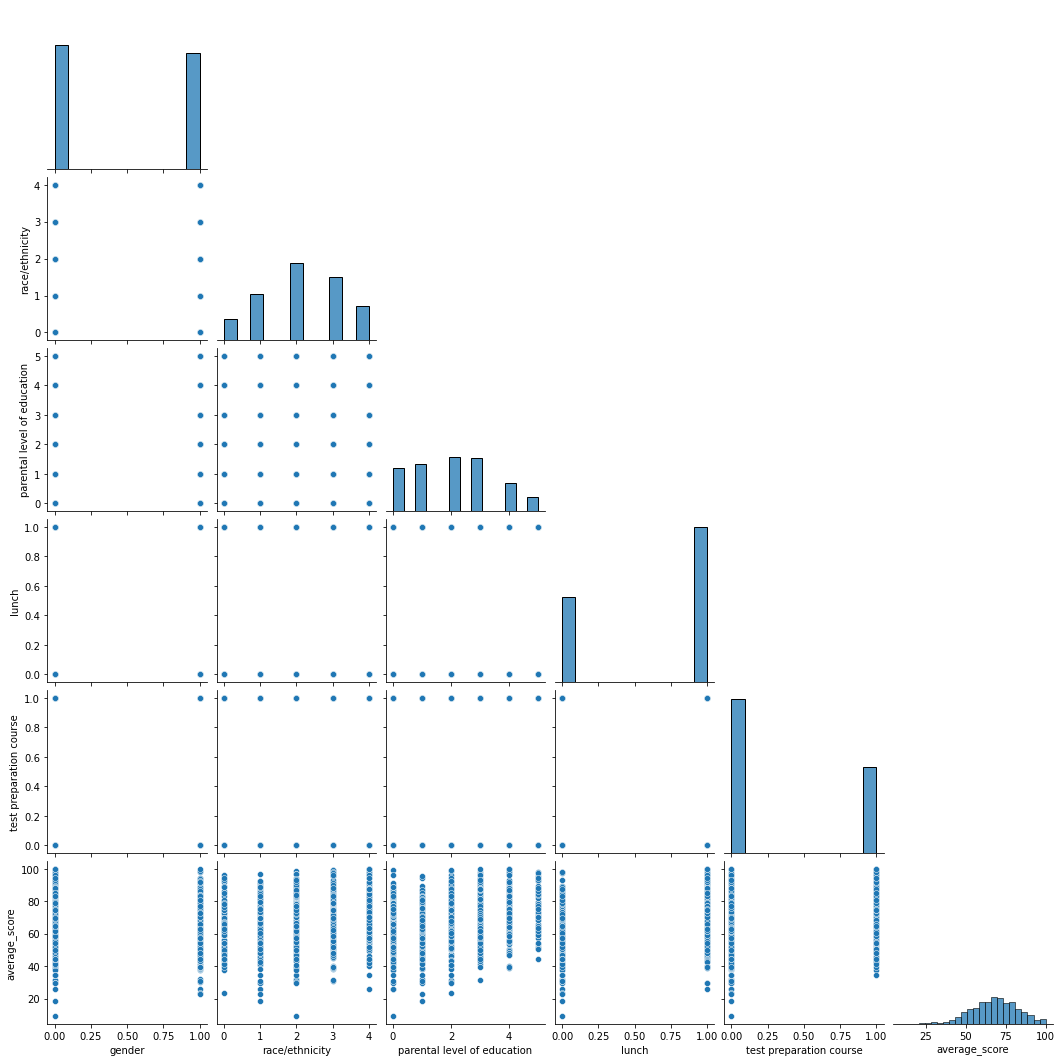

In [149]:
#pairplot matrix
sns.pairplot(data, palette = 'Blues', diag_kind = 'hist', corner = True)

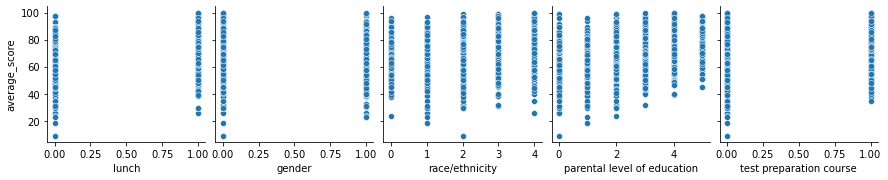

In [150]:
#наиболее интересна взаимосвязь между целевой переменной 'average_score' и входными параметрами
sns.pairplot(data, palette = 'Blues',
             x_vars = ['lunch', 'gender', 'race/ethnicity', 'parental level of education', 'test preparation course'],
             y_vars = ['average_score'])

In [ ]:
"""
Предполагаю отсутствие зависимости между входными переменными.
Очевидно наличие зависимости между входными и целевой переменной:
1. вероятно, что не пропускающие обед тестируются лучше
2. вероятно, мужчины и женщины примерно одинаково тестируются(нужно посмотреть, что за низкие оценки)
3. рассовая принадлежность, вероятно, имеет значение
4. вероятно, чем образованнее родители, тем лучше тестируются их дети
5. подготовка к экзамену имеет значение
"""